<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/Statistics-and-Machine-Learning/blob/main/C2_ML_PracticalApplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Pore Limiting Diameter (PLD) in a MOF Dataset

<img src="https://github.com/MehrdadJalali-KIT/PredictiveModelingDemo/raw/main/MOF.png" alt="MOF" width="200" height="200">

**Objective:**
The goal of this code is to load and explore a dataset related to Metal-Organic Frameworks (MOFs) and to set up the initial steps for predicting the Pores Limiting Diameter (PLD) of MOF structures.

**Code Explanation:**

1. **Library Import:** In the first step, we import the necessary Python libraries for data manipulation and analysis. The key library used here is `pandas`, which is commonly used for working with structured data.

2. **Define Data Source:** We specify the source of our dataset by providing the URL to a raw CSV file on GitHub. The dataset contains information related to MOFs.









<font color="blue">**Step 1: Import Required Libraries**</font>

In [ ]:
# Import pandas library as 'pd' for data manipulation and analysis
import pandas as pd

# Import SimpleImputer from sklearn(scikit-learn)to handle missing data imputation
from sklearn.impute import SimpleImputer

# Import MinMaxScaler from sklearn for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Import train_test_split from sklearn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import LogisticRegression and DecisionTreeClassifier from sklearn for classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Import classification_report, confusion_matrix, accuracy_score, and precision_recall_fscore_support
# from sklearn.metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

# Import matplotlib.pyplot as 'plt' for data visualization
import matplotlib.pyplot as plt

# Import seaborn as 'sns' for enhanced data visualization
import seaborn as sns



<font color="blue">**Step 2: Load the Dataset**</font>

In this step, we load the dataset from a remote URL using the Pandas library. The dataset, located at the following URL, contains information about...

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/MehrdadJalali-KIT/PredictiveModelingDemo/main/MOF3.csv"
df = pd.read_csv(url) # load csv file and put into a dataframe (df)

#print the dimensions (shape) of the DataFrame
print("Dimention(Shape) of Dataset:",df.shape)

# Display the first 20 rows of the dataset in a table
df.head(20)


<font color="blue">**Step 3: Data Preprocessing**</font>

Before training our predictive model, we need to preprocess the dataset. This involves handling missing values and normalizing the features.
# Data Imputation and data Normalization

We use mean method for data imputation for filling missign values.
We use the Min-Max scaling technique to normalize the data. This technique rescales the data so that it falls within the specified range. The formula for Min-Max scaling is as follows:

In [ ]:
# Separate input features and target labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Impute missing values with mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize the features using StandardScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_imputed)

# Transfer X_normalized to the data frame
df_output = pd.DataFrame(X_normalized)

# Print the first 20 rows
df_output.head(20)


<font color="blue"> Plot data scaling </font>
The box plot visually compares the distribution of feature values before and after normalization, showing the impact of the scaling process on the data.

In [ ]:
# Create box plots for the original data and the normalized data
plt.figure(figsize=(12, 6))

# Box plot for the original data
plt.subplot(1, 2, 1)
sns.boxplot(data=X_imputed, orient='vertical')
plt.title('Box Plot (Original Data)')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

# Box plot for the normalized data
plt.subplot(1, 2, 2)
sns.boxplot(data=X_normalized, orient='vertical')
plt.title('Box Plot (Normalized Data)')
sns.set(font_scale=1)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout()
plt.show()

<font color="blue">**Step 4: Split Train and Test**</font>

Now that we have preprocessed the data, we split it into training and testing sets.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)
# Print the number of training and testing samples
print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])





Number of training samples: 806
Number of testing samples: 202


<font color="blue">**Step 5: Train the model**</font>

train a Logistic Regression model.

In [ ]:
# Train a Logistic Regression model
model = DecisionTreeClassifier()


#This is the method call to fit (train) the classifier on the training data. It takes two arguments
model.fit(X_train, y_train)

DecisionTreeClassifier()

<font color="blue">**Step 6: Evaluate Model Performance**</font>

With the model trained, we can now evaluate its performance. We will calculate various classification metrics such as precision, recall, F1-score, and accuracy.

In [ ]:
# Predict on the test set with dt_classifier which previously trained
y_pred = model.predict(X_test)

# Calculate precision, recall, F1-score, and accuracy
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)


<font color="blue">**Step 6: Visualize Results** </font>

Finally, we visualize the results of our predictive model by creating a bar plot of classification metrics and a confusion matrix.

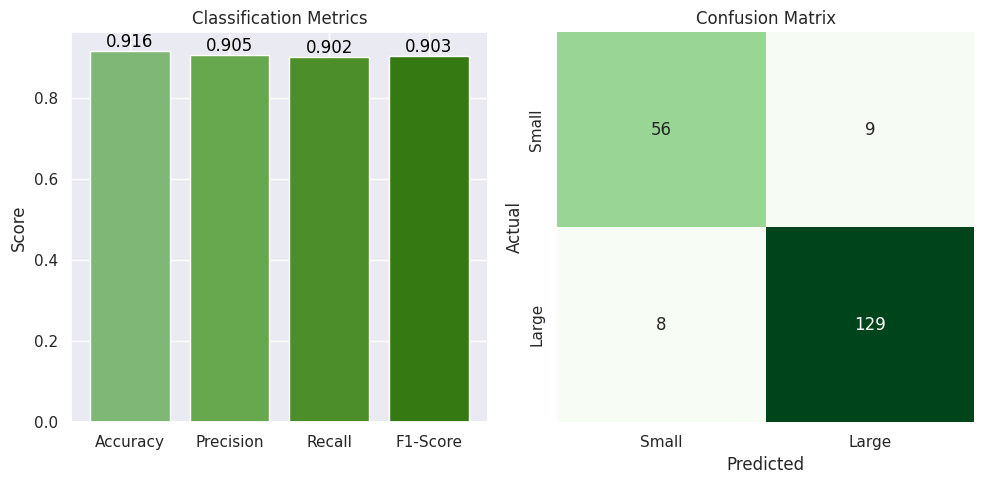

In [ ]:
# Create a bar plot to compare metrics with different shades of green
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

# Define different shades of green for bars
colors = ['#7FB876', '#67A84F', '#4C8E29', '#357913']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(metrics, values, color=colors)
plt.title('Classification Metrics')
plt.ylabel('Score')

# Add labels to the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(values[i], 3), ha='center', color='black')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with different shades of green
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Small', 'Large'], yticklabels=['Small', 'Large'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


<font color="blue">**Step 7: Generate Explanations Using OpenAI GPT-3.5** </font>

In this step, we utilize OpenAI's GPT-3.5-turbo, a powerful language model, to generate explanations for machine learning model evaluation metrics. We aim to gain insights into how well our classification model performs in predicting Pores Limiting Diameter (PLD) for MOF materials, where PLD can be categorized as either "Small" or "Large."

In [ ]:
import openai

# Set your OpenAI API key
openai.api_key = "???"


# Generate explanations using OpenAI GPT-3
explanation_prompt = f"Provide an explanation for the following machine learning model evaluation metrics, this classification predcit PLD (Pores Limiting Diameter) of each MOF materails, PLD can be Small or Large\n\n" \
                     f"- Accuracy: {accuracy}\n" \
                     f"- Precision: {precision}\n" \
                     f"- Recall: {recall}\n" \
                     f"- F1-Score: {f1_score}\n\n" \
                     f"Include insights about the model's performance and what these metrics indicate."


# Generate an explanation using GPT-3.5-turbo
# response = openai.Completion.create(
#     model="gpt-3.5-turbo",
#     prompt=explanation_prompt,
#     max_tokens=100  # Adjust based on the desired length of the explanation
# )

# Generate an explanation using GPT-3.5-turbo chat model
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": explanation_prompt}
    ]
)


# ...

# Extract the generated explanation from the response
generated_explanation = response['choices'][0]['message']['content']

# Split the generated explanation into sentences
sentences = generated_explanation.split('. ')

# Print each sentence in blue on a separate row
for sentence in sentences:
    print(f'\033[94m{sentence}\033[0m')  # Use ANSI escape code for blue color

# ...


# Define different shades of green for bars
colors = ['#7FB876', '#67A84F', '#4C8E29', '#357913']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(metrics, values, color=colors)
plt.title('Classification Metrics')
plt.ylabel('Score')

# Add labels to the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, round(values[i], 3), ha='center', color='black')

# Plot confusion matrix with different shades of green
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Small', 'Large'], yticklabels=['Small', 'Large'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


In [ ]:
!pip install openai==0.28

<font color="blue">**Compare Classification Methods** </font>

In [ ]:
import openai
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set your OpenAI API key
openai.api_key = "??"

# Load the dataset
url = "https://raw.githubusercontent.com/MehrdadJalali-KIT/PredictiveModelingDemo/main/MOF3.csv"
df = pd.read_csv(url)

# Separate features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Impute missing values with mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_imputed)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

results = {}

# Train and evaluate each classifier
for classifier_name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    results[classifier_name] = accuracy

# Sort classifiers by accuracy
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

# Generate explanations using OpenAI GPT-3
explanation_prompt = "Compare the performance of the following classifiers based on accuracy for predcition PLD size of the MOF materials, and also mention why the results could be like this:\n\n"

for classifier_name, accuracy in sorted_results.items():
    explanation_prompt += f"- {classifier_name}: {accuracy}\n"

# Generate an explanation using GPT-3.5-turbo chat model
response = openai.ChatCompletion.create(
    model="gpt-4-0613",
    # model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": explanation_prompt}
    ]
)

# Extract the generated explanation from the response
generated_explanation = response['choices'][0]['message']['content']

# Split the generated explanation into sentences
sentences = generated_explanation.split('. ')

# Print each sentence in blue on separate rows
for sentence in sentences:
    print(f'\033[94m{sentence}\033[0m')  # Use ANSI escape code for blue color

# Plot accuracy for each classifier
plt.figure(figsize=(10, 5))
sns.barplot(x=list(sorted_results.keys()), y=list(sorted_results.values()), palette='viridis')
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



ModuleNotFoundError: No module named 'openai'

<Font color=blue size=5><b>Predicting Unseen Data</b></font>

In this section, we will use the trained machine learning model to predict the PLD (Pores Limiting Diameter) of MOF materials for unseen data. The unseen data contains a set of features similar to the one used for training, and we will apply the same data preprocessing steps to ensure consistency.

### Unseen Data

Let's first load the unseen data from the following source:
[Unseen Data Source](https://raw.githubusercontent.com/MehrdadJalali-KIT/PredictiveModelingDemo/main/MOF3_Unseen.csv)

We will display the unseen data in a table to provide an overview of the input features.

### Data Preprocessing

Before making predictions, we need to perform the same data preprocessing steps as we did for the training data. These steps include handling missing values and normalizing the features.

### Prediction

Once the data is preprocessed, we will use our trained machine learning model to predict the PLD size of the MOF materials for the unseen data. The predictions will be displayed alongside the input features, creating a complete table of data with the predicted PLD values.

Let's proceed with loading and preprocessing the unseen data and making predictions.


In [ ]:
# Load the unseen data for prediction
unseen_url = "https://raw.githubusercontent.com/MehrdadJalali-KIT/PredictiveModelingDemo/main/MOF3_Unseen.csv"
df_unseen = pd.read_csv(unseen_url)
df_unseen


In [ ]:

# Normalize the unseen data
X_unseen = df_unseen.values  # Assuming the unseen data has the same format as the training data
X_unseen_normalized = scaler.transform(X_unseen)

# Make predictions using the trained model
predictions = model.predict(X_unseen_normalized)

# Create a new DataFrame with original data and predictions
df_predictions = pd.DataFrame(data=df_unseen)
df_predictions['Predictions'] = predictions
df_predictions

<font color=blue size=5><b>K-Mean Clustering</b></font>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/MehrdadJalali-KIT/PredictiveModelingDemo/main/MOF3.csv"
df = pd.read_csv(url)

# Exclude the last column (class label) from the dataset
X = df.iloc[:, :-1]

# Impute missing values with mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_imputed)

# Perform K-Means clustering with k=2
k = 2
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(X_normalized)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_normalized, cluster_labels)

# Create subplots for data points before and after clustering
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot data points before clustering
axes[0].scatter(X_normalized[:, 0], X_normalized[:, 1], c='blue', marker='o', edgecolor='k', s=50)
axes[0].set_title('Data Points Before Clustering')
axes[0].set_xlabel(X.columns[0])  # Set the actual column name as x-axis label
axes[0].set_ylabel(X.columns[1])  # Set the actual column name as y-axis label

# Plot data points after clustering
scatter = axes[1].scatter(X_normalized[:, 0], X_normalized[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
axes[1].set_title('Data Points After Clustering (K=2)')
axes[1].set_xlabel(X.columns[0])  # Set the actual column name as x-axis label
axes[1].set_ylabel(X.columns[1])  # Set the actual column name as y-axis label

# Add colorbar to the right subplot
colorbar = plt.colorbar(scatter, ax=axes[1])
colorbar.set_label('Cluster Labels')
plt.suptitle(f"Silhouette Score: {silhouette_avg:.2f}", y=1.02)  # Add silhouette score to the title

plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Load the dataset
url = "https://raw.githubusercontent.com/MehrdadJalali-KIT/PredictiveModelingDemo/main/MOF3.csv"
df = pd.read_csv(url)

# Exclude the last column (class label) from the dataset
X = df.iloc[:, :-1]

# Create a pair plot for all features as data points
# Filter out UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)
sns.pairplot(X, diag_kind='kde', markers='o', palette='viridis');
plt.suptitle("Pair Plot of Features as Data Points", y=1.02);  # Add a title
plt.show()



<font color=blue size=5><b>**Concept Drift**</b></font>

In the plot, you will see two bars labeled "Period 1" and "Period 2." These bars represent the accuracy of the model for the respective time periods. If the accuracy varies significantly between the periods, it indicates concept drift—the model's performance has changed over time, and it may require adaptation to the evolving data distribution.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the initial dataset
url = "https://raw.githubusercontent.com/MehrdadJalali-KIT/PredictiveModelingDemo/main/MOF3.csv"
df = pd.read_csv(url)

# Define the time period for concept drift (e.g., 50% of the data for each period)
split_ratio = 0.5
split_index = int(len(df) * split_ratio)

# Split the data into two time periods
df_period1 = df.iloc[:split_index, :]
df_period2 = df.iloc[split_index:, :]

# Lists to store accuracy for each time period
accuracies = []

# Function to preprocess and evaluate a dataset
def evaluate_dataset(df):
    # Separate features and labels
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Impute missing values with mean strategy
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Normalize the features using StandardScaler
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X_imputed)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

    # Train a Logistic Regression model
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Evaluate the model on the first time period
accuracy1 = evaluate_dataset(df_period1)
accuracies.append(accuracy1)

# Evaluate the model on the second time period
accuracy2 = evaluate_dataset(df_period2)
accuracies.append(accuracy2)

# Plot the accuracy over time
periods = ['Period 1', 'Period 2']
plt.bar(periods, accuracies, color=['blue', 'green'])
plt.xlabel('Time Period')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time (Concept Drift)')
plt.ylim(0, 1)  # Set the y-axis limits
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL to the raw CSV file on GitHub
file_url = 'https://raw.githubusercontent.com/MehrdadJalali-KIT/PredictiveModelingDemo/main/MOF3.csv'

# Read the CSV file from the raw URL
df = pd.read_csv(file_url)

# Extract the class labels from the last column
class_labels = df.iloc[:, -1]

# Create a count plot or a histogram to visualize the distribution of class labels
plt.figure(figsize=(8, 6))
sns.countplot(x=class_labels)
plt.title('Distribution of Class Labels')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()
